In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

In [32]:
# Generate a non-linear synthetic classification dataset
def generate_non_linear_data(n_samples=300, n_features=2, n_informative=2,n_redundant=0, random_state=42):
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_redundant=n_redundant,
        random_state=random_state,
        class_sep=0.5
    )
    return X, y

In [29]:
# Function to evaluate SVM with different kernels
def evaluate_svm_kernels(X_train, X_test, y_train, y_test, kernels):
    results = {}

    for kernel in kernels:

        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        results[kernel] = {
            'model': svm,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred, average='weighted'),
            'classification_report': classification_report(y_test, y_pred)
        }

    return results

In [30]:
# Visualization function for decision boundaries
def plot_decision_boundaries(X, y, models, kernels):

    plt.figure(figsize=(16, 12))

    for i, (kernel, model) in enumerate(zip(kernels, models), 1):
        plt.subplot(2, 2, i)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,edgecolor='black', s=20)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
        plt.title(f'SVM Decision Boundary - {kernel.upper()} Kernel')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

SVM Kernel Comparison:

Kernel: linear
Accuracy: 0.8000
F1 Score: 0.7985
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.79        47
           1       0.74      0.91      0.81        43

    accuracy                           0.80        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.82      0.80      0.80        90


Kernel: rbf
Accuracy: 0.8444
F1 Score: 0.8444
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        47
           1       0.81      0.88      0.84        43

    accuracy                           0.84        90
   macro avg       0.85      0.85      0.84        90
weighted avg       0.85      0.84      0.84        90


Kernel: poly
Accuracy: 0.7000
F1 Score: 0.6891
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.51      0.64        47


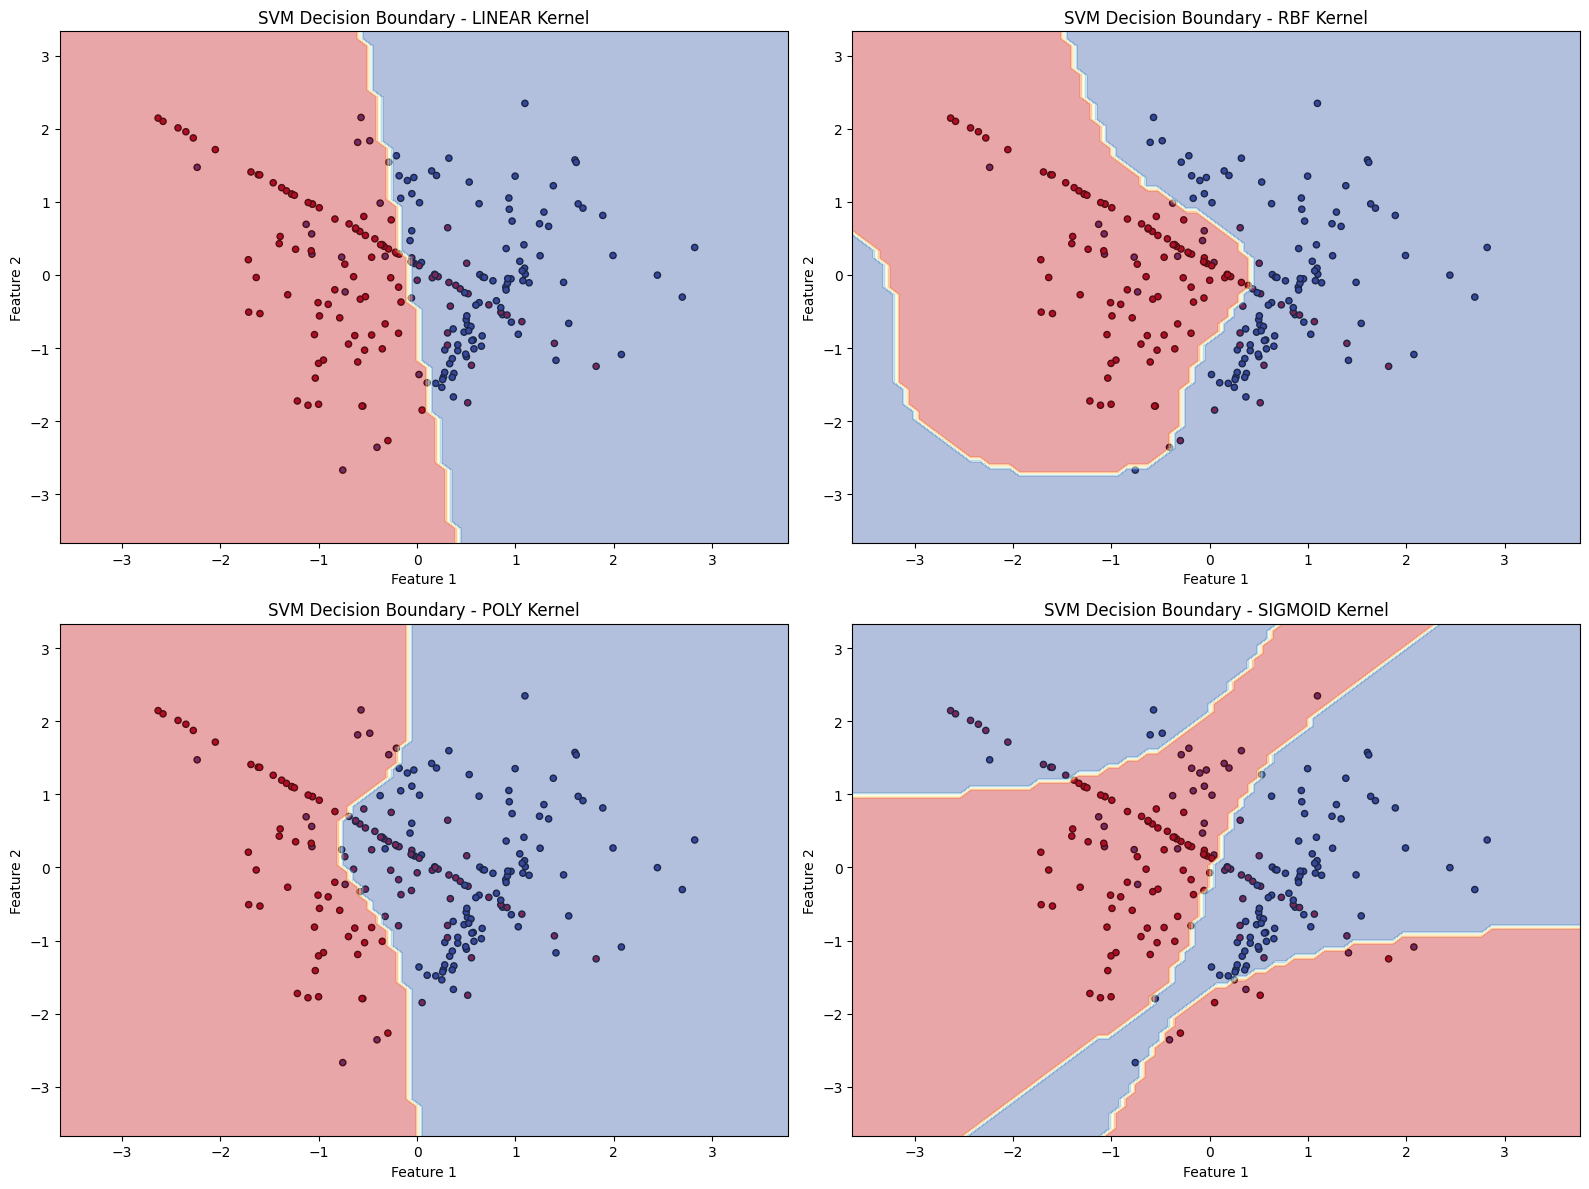

In [33]:

X, y = generate_non_linear_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kernels to evaluate
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

results = evaluate_svm_kernels(
    X_train_scaled, X_test_scaled, y_train, y_test, kernels
)

print("SVM Kernel Comparison:")
for kernel, metrics in results.items():
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")
    print("Classification Report:")
    print(metrics['classification_report'])

# Visualize decision boundaries for all kernels
plot_decision_boundaries(
    X_train_scaled, y_train,
    [results[kernel]['model'] for kernel in kernels],
    kernels
)